In [17]:
import pandas as pd
import numpy as np
import os
# Specify the directory path
directory = 'lecture-dataset'

# Get the list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Create an empty dataframe
df = pd.DataFrame()

# Read each CSV file and append it to the dataframe
for file in csv_files:
    file_path = os.path.join(directory, file)
    df_temp = pd.read_csv(file_path)
    df = pd.concat([df, df_temp], ignore_index=True)

df['Timestamp']=pd.to_datetime(df['Timestamp'], unit='s')



In [18]:
nan_sum = df.isna().sum()

nan_percentage = (nan_sum/len(df))*100

print(nan_percentage)

col_drop = []

for i in range(0,len(nan_percentage)):
  if nan_percentage[i] > 60:
    col_drop.append(nan_percentage.index[i])

print(col_drop)

clean_df = df.drop(col_drop, axis=1)


Timestamp                     0.000000
MAC Address                   0.000000
Channel                       0.000000
DS Channel                    0.581395
HT Capabilities               0.020048
Extended Capabilities         0.020048
Vendor Specific Tags         18.905373
SSID                         91.439455
Supported Rates               0.000000
Extended Supported Rates      0.020048
VHT Capabilities            100.000000
HE Capabilities              81.295108
Length                        0.000000
Label                         0.000000
dtype: float64
['SSID', 'VHT Capabilities', 'HE Capabilities']


/var/folders/wf/h4cmwskx1rxch7ts3ytb_7cr0000gn/T/ipykernel_19054/1755956911.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if nan_percentage[i] > 60:


In [19]:
unique_elem = clean_df.nunique()

print(unique_elem)

features = []

for i in range(0,len(unique_elem)-1):
  if unique_elem[i] < 20:
    features.append(unique_elem.index[i])

print(features)

Timestamp                   4988
MAC Address                  718
Channel                        3
DS Channel                    13
HT Capabilities                8
Extended Capabilities          7
Vendor Specific Tags           5
Supported Rates                4
Extended Supported Rates       2
Length                        16
Label                          7
dtype: int64
['Channel', 'DS Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'Supported Rates', 'Extended Supported Rates', 'Length']


/var/folders/wf/h4cmwskx1rxch7ts3ytb_7cr0000gn/T/ipykernel_19054/4178496395.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if unique_elem[i] < 20:


In [20]:
clean_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2023-05-20 13:29:58.574080944,76:f7:2b:0e:35:f3,1,1.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
1,2023-05-20 13:29:58.574084044,76:f7:2b:0e:35:f3,1,1.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
2,2023-05-20 13:29:58.814193010,76:f7:2b:0e:35:f3,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
3,2023-05-20 13:29:58.814196110,76:f7:2b:0e:35:f3,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
4,2023-05-20 13:29:59.015255928,76:f7:2b:0e:35:f3,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
...,...,...,...,...,...,...,...,...,...,...,...
4983,2021-05-31 16:00:46.843775034,22:45:43:e4:c8:fd,1,1.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,02040b16,0c1218243048606c,144,iPhone6_N
4984,2021-05-31 16:00:46.950447083,22:45:43:e4:c8:fd,6,4.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,02040b16,0c1218243048606c,156,iPhone6_N
4985,2021-05-31 16:00:46.970405102,22:45:43:e4:c8:fd,6,4.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,02040b16,0c1218243048606c,156,iPhone6_N
4986,2021-05-31 16:00:46.998914957,22:45:43:e4:c8:fd,6,5.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,02040b16,0c1218243048606c,156,iPhone6_N


In [21]:
from sklearn.preprocessing import LabelEncoder

def encoder(df,features):
  df_tmp = df.copy()
  for elem in features:
    if elem != 'Lenght' and elem != 'Channel' and elem != 'DS Channel':
      label_encoder = LabelEncoder()
      df_tmp[elem] = label_encoder.fit_transform(df_tmp[elem].astype(str))

  df_tmp[features]=df_tmp[features].astype(float)
  return df_tmp


In [22]:

encoded_df = encoder(clean_df,features)

burst_df = encoded_df.drop(['Timestamp'],axis=1).copy()
# burst_df = burst_df.groupby(['MAC Address'])
# burst_df = burst_df.first().reset_index()

display(burst_df)

# label_count = burst_df["Label"].value_counts()
# print(label_count)




,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,76:f7:2b:0e:35:f3,1.0,1.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
1,76:f7:2b:0e:35:f3,1.0,1.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
2,76:f7:2b:0e:35:f3,6.0,6.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
3,76:f7:2b:0e:35:f3,6.0,6.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
4,76:f7:2b:0e:35:f3,11.0,11.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
...,...,...,...,...,...,...,...,...,...,...
4983,22:45:43:e4:c8:fd,1.0,1.0,2.0,2.0,1.0,0.0,0.0,7.0,iPhone6_N
4984,22:45:43:e4:c8:fd,6.0,4.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N
4985,22:45:43:e4:c8:fd,6.0,4.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N
4986,22:45:43:e4:c8:fd,6.0,5.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(df, column1, column2, colormap="Blues"):
   crosstab = pd.crosstab(df[column1], df[column2])

   sns.set_theme(style="whitegrid",font_scale=1)
   plt.figure(figsize=(15,10))

   sns.heatmap(crosstab,annot=True, fmt="d", cmap=colormap)

   plt.title(f"Heatmap of {column1} vs {column2}")
   plt.xlabel(column2)
   plt.ylabel(column1)

   plt.show()

In [24]:
usable_features = features.copy()
usable_features.append('MAC Address')
usable_features

['Channel',
 'DS Channel',
 'HT Capabilities',
 'Extended Capabilities',
 'Vendor Specific Tags',
 'Supported Rates',
 'Extended Supported Rates',
 'Length',
 'MAC Address']

In [25]:
usable_features

['Channel',
 'DS Channel',
 'HT Capabilities',
 'Extended Capabilities',
 'Vendor Specific Tags',
 'Supported Rates',
 'Extended Supported Rates',
 'Length',
 'MAC Address']

In [26]:
from sklearn.metrics import homogeneity_completeness_v_measure

# Function to calculate the number of matching features between two rows
def count_matching_features(row1, row2):
    return sum(row1[feature] == row2[feature] for feature in usable_features)

# Clustering function
def cluster_rows(df, N):
    # Dictionary to store clusters and their corresponding feature combinations
    clusters = {}

    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        # Initialize variables to track best matching cluster
        best_cluster_id = None
        max_matching_features = 0

        # Calculate matching features with each existing cluster
        for cluster_id, cluster_row in clusters.items():
            num_matching_features = count_matching_features(row, cluster_row)

            # It also handles ties, because the first cluster with the same number of matching features will be selected
            if num_matching_features >= N and num_matching_features > max_matching_features:
                best_cluster_id = cluster_id
                max_matching_features = num_matching_features

        # Assign the current row to an existing or new cluster
        if best_cluster_id is not None:
            # Assign to existing cluster with sufficient matching features
            df.loc[index, 'Cluster ID'] = best_cluster_id
            # Update the cluster row to include the current row's features (for potential future matches)
            clusters[best_cluster_id] = row
        else:
            # Create a new cluster with a new cluster ID
            new_cluster_id = len(clusters)
            clusters[new_cluster_id] = row
            df.loc[index, 'Cluster ID'] = new_cluster_id
            
    h, c, v = homogeneity_completeness_v_measure(df["Label"], df["Cluster ID"])
    n_unique_clusterid = len(np.unique(df["Cluster ID"]))
    n_unique_label = len(np.unique(df["Label"]))
    error = n_unique_clusterid - n_unique_label
    
    return df, h, c, v, error



In [12]:

# Calculate V-measure score for different values of N
results = []

for N in range(1, len(usable_features)+1):
    df_clustered = burst_df.copy()
    _, h, c, v, error = cluster_rows(df_clustered, N)
    results.append({'N': N, 'V-measure': v, 'Homogeneity': h, 'Completeness': c,  'Error': error})

# Display results
results_df = pd.DataFrame(results)
print(results_df)

   N  V-measure  Homogeneity  Completeness  Error
0  1   0.014501     0.007421      0.316012     -5
1  2   0.621849     0.458726      0.965005     -3
2  3   0.695341     0.541834      0.970213     -2
3  4   0.919767     0.888904      0.952850      1
4  5   0.924705     0.903406      0.947031      2
5  6   0.796371     0.959259      0.680772     12
6  7   0.642837     0.954897      0.484502     34
7  8   0.520160     1.000000      0.351497    164


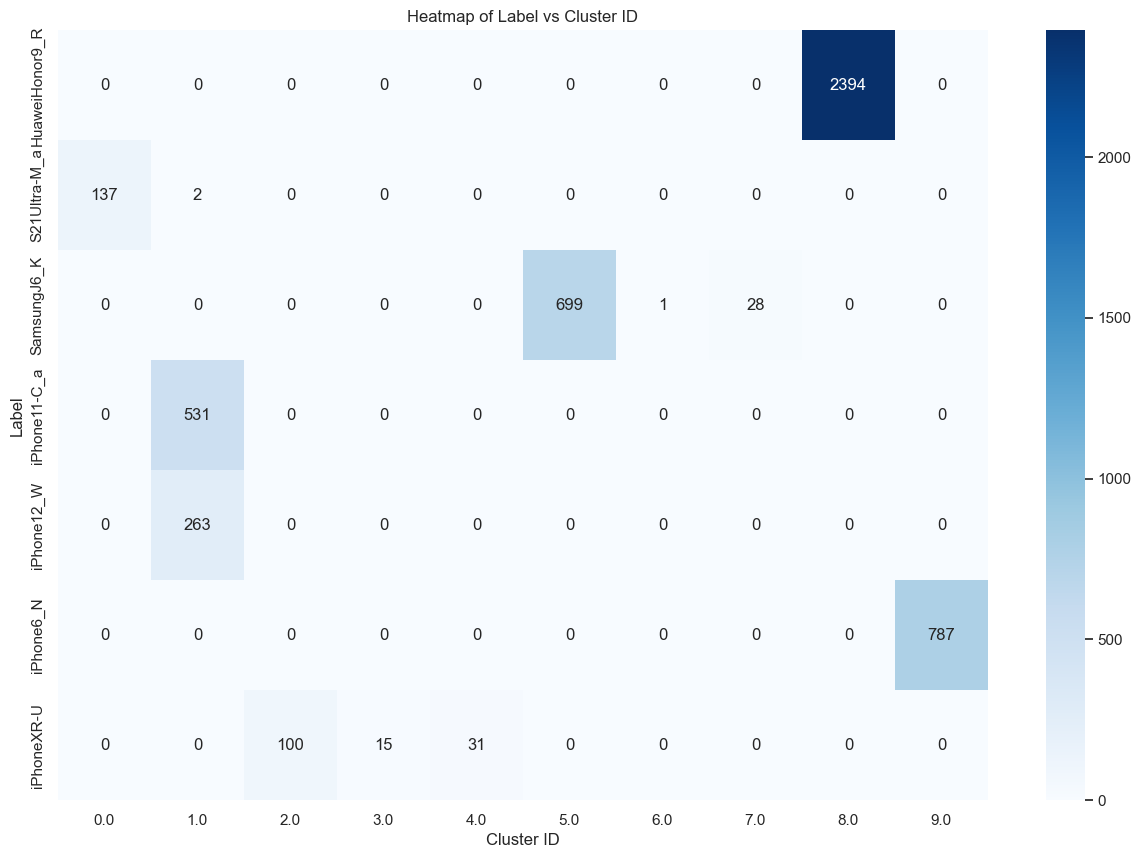

In [28]:
best_df, _, _, _, _ = cluster_rows(burst_df, 5)
plot_heatmap(best_df, "Label", "Cluster ID")


In [116]:
# Read csv files from challenge-dataset, and assign each of them to a different dataframe 
directory = 'challenge-dataset'
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
challenge_dfs = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]


In [98]:
# np.random.seed(0)

# K = 3
# random_dfs = pd.DataFrame()
# for test_set in range(5):
#     random_indices = np.random.choice(len(challenge_dfs), K, replace=False)
#     random_dfs[test_set] = [challenge_dfs[i] for i in random_indices]


In [181]:
# Define K values (number of dataframes to select for each test set)
K_values = [2, 3, 4, 5, 6]

# Number of test sets to create
num_test_sets = 5

# Dictionary to store random selections for each test set
random_dfs = {f"Test Set {i+1}": [] for i in range(num_test_sets)}

# Loop through each test set
for i in range(num_test_sets):
    # Randomly select K dataframes for the current test set
    for K in K_values:
        random_indices = np.random.choice(len(challenge_dfs), K, replace=False)
        selected_dfs = pd.DataFrame()
        for index in random_indices:
            selected_dfs = pd.concat([selected_dfs, challenge_dfs[index]], ignore_index=True)
        random_dfs[f"Test Set {i+1}"].append(selected_dfs)

# Convert random_dfs dictionary into a dataframe
random_dfs_df = pd.DataFrame(random_dfs)

# Display the second dataframe of the fourth test set
test_set_index = 3  # Fourth test set (index is 3 because of zero-indexing)
dataframe_index = 1  # Second dataframe (index is 1 because of zero-indexing)

result_df = random_dfs_df.iloc[dataframe_index, test_set_index]
print(result_df)


         Timestamp        MAC Address  Channel  DS Channel  \
0     1.624955e+09  da:a1:19:d1:b8:3e        1           1   
1     1.624955e+09  da:a1:19:d1:b8:3e        1           1   
2     1.624955e+09  da:a1:19:d1:b8:3e        1           2   
3     1.624955e+09  da:a1:19:d1:b8:3e        1           2   
4     1.624955e+09  da:a1:19:d1:b8:3e       11           3   
...            ...                ...      ...         ...   
3571  1.623910e+09  02:59:a8:79:24:48       11          11   
3572  1.623910e+09  02:59:a8:79:24:48       11          12   
3573  1.623910e+09  02:59:a8:79:24:48       11          12   
3574  1.623910e+09  02:59:a8:79:24:48       11          13   
3575  1.623910e+09  02:59:a8:79:24:48       11          13   

                                        HT Capabilities  \
0     210017ff00000000000000000080010000000000000000...   
1     210017ff00000000000000000080010000000000000000...   
2     210017ff00000000000000000080010000000000000000...   
3     210017ff00000

In [187]:
random_dfs_df.iloc[4,1]['Label'].unique()

array(['XiaomiRedmiNote9S_T', 'GooglePixel3A_V', 'SamsungM31_A',
       'HuaweiHonor9_R', 'SamsungS7_I', 'iPhone12_W'], dtype=object)

In [183]:
random_dfs_df

,Test Set 1,Test Set 2,Test Set 3,Test Set 4,Test Set 5
0,Timestamp MAC Address Channel ...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...
1,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...
2,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...
3,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...
4,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...,Timestamp MAC Address Channel...


In [136]:
# combine the two dataframe
combined_df = pd.DataFrame()
combined_df = pd.concat([combined_df, challenge_dfs[random_indices[0]]], ignore_index=True)


,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,1.624955e+09,da:a1:19:d1:b8:3e,1,1,210017ff00000000000000000080010000000000000000...,88001400040,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
1,1.624955e+09,da:a1:19:d1:b8:3e,1,1,210017ff00000000000000000080010000000000000000...,88001400040,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
2,1.624955e+09,da:a1:19:d1:b8:3e,1,2,210017ff00000000000000000080010000000000000000...,88001400040,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
3,1.624955e+09,da:a1:19:d1:b8:3e,1,2,210017ff00000000000000000080010000000000000000...,88001400040,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
4,1.624955e+09,da:a1:19:d1:b8:3e,11,3,210017ff00000000000000000080010000000000000000...,88001400040,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,1.624975e+09,5c:c3:07:07:af:59,11,11,210017ff00000000000000000080010000000000000000...,88001400040,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
2390,1.624975e+09,5c:c3:07:07:af:59,11,12,210017ff00000000000000000080010000000000000000...,88001400040,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
2391,1.624975e+09,5c:c3:07:07:af:59,11,12,210017ff00000000000000000080010000000000000000...,88001400040,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
2392,1.624975e+09,5c:c3:07:07:af:59,11,13,210017ff00000000000000000080010000000000000000...,88001400040,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R


In [180]:
np.random.choice(len(challenge_dfs), 6, replace=False)

array([4, 1, 0, 2, 3, 5])